In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns

sns.set_theme(style="ticks")
palette = 'BuPu_r'
dpi = 100
sns.set_palette(palette)


In [201]:
def r_t(s, r_s, l_t, N, W, L):
    return (r_s * s / (N * W + (N-1) * (2 *s + L))) + (2 * r_s * l_t / (N * W + (N-1) * (2 *s + L)))
gmodel5 = Model(r_t)
param5 = gmodel5.make_params()
param5['r_s'].set(value = 1e8, min = 0)
param5['l_t'].set(value = 1e-5, min = 1e-5)
param5['L'].set(value = 3200e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 60, vary = False)

,Contact Resistance,Sheet resistance,Conductivity ($\Sigma$)
0G_18,1412.492601,2.671024e+09,0.000019
0G_13,472.255482,8.930351e+08,0.000056


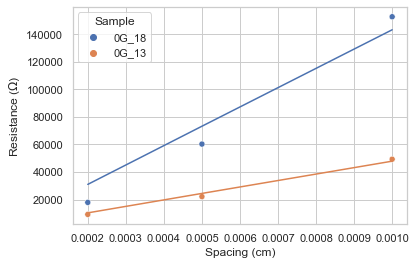

In [202]:
#0G_18 LCR measurement
sns.set_theme(style="whitegrid")
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_18\C1'
files = [os.path.join(path, i) for i in os.listdir(path)]
cols = ['Spacing (cm)', 'Resistance ($\Omega$)']
a = pd.DataFrame(columns = cols) #, index = np.arange(0,len(files)))
cols_r = ['Contact Resistance', 'Sheet resistance', 'Conductivity ($\Sigma$)']
results = pd.DataFrame(columns = cols_r)#, index = ['LCR', 'Pot'])
n = 0
for i in files:
    df = pd.read_csv(i)
    slope, intercept, r_value, p_value, std_err = linregress(df['Vds'], df['Idc'])
    if i[-5:-4] == '1':
        a.loc[n] = [2e-4,  1 / slope]
    elif i[-5:-4] == '2':
        a.loc[n] = [5e-4,  1 / slope]
    elif i[-5:-4] == '3':
        a.loc[n] = [10e-4,  1 / slope]
    n += 1
a.sort_values(by=[cols[0]], inplace = True)
r = gmodel5.fit(a[cols[1]], param5, s = a[cols[0]]) #result
plt.plot(a[cols[0]], r.best_fit)
rc = gmodel5.eval(r.params, s = 0) # 2 times contact resistance
l_t = r.best_values['l_t'] # transfer length
r_s = r.best_values['r_s'] # sheet resistance
sigma = 1 / (r_s * 0.2e-4)
results.loc['0G_18'] = [rc/2, r_s, sigma]
a['Sample'] = '0G_18'

#0G_13 LCR
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\LCR\0G_13'
files = [os.path.join(path, i) for i in os.listdir(path)]
b = pd.DataFrame(columns = cols)
n = 0
for i in files:
    df = pd.read_csv(i)
    slope, intercept, r_value, p_value, std_err = linregress(df['Vds'], df['Idc'])
    if i[-5:-4] == '1':
        b.loc[n] = [2e-4,  1 / slope]
    elif i[-5:-4] == '2':
        b.loc[n] = [5e-4,  1 / slope]
    elif i[-5:-4] == '3':
        b.loc[n] = [10e-4,  1 / slope]
    n += 1
b.sort_values(by=[cols[0]], inplace = True)
r2 = gmodel5.fit(b[cols[1]], param5, s = b[cols[0]])
plt.plot(b[cols[0]], r2.best_fit)
rc = gmodel5.eval(r2.params, s = 0) # 2 times contact resistance
l_t = r2.best_values['l_t'] # transfer length
r_s = r2.best_values['r_s'] # sheet resistance
sigma = 1 / (r_s * 0.2e-4)
results.loc['0G_13'] = [rc/2, r_s, sigma]
b['Sample'] = '0G_13'
ab = pd.concat([a,b])

sns.scatterplot(data = ab, x = cols[0], y = cols[1], hue = 'Sample')
results.head()


In [ ]:
#0G_18 potentiostat

path = r''
